# Decision Tree

### Importação de Bibliotecas

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

### Leitura de Arquivo CSV - atenção ao separador ";"

In [3]:
df = pd.read_csv("./emprestimo.csv",sep=";") 
df # mostra todo o dataset no formato original (dados categóricos)

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


In [4]:
df.sort_values(by=['montante'], ascending=False)

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
10,Medio,Media,Alto,Nao,Sim
2,Baixo,Senior,Baixo,Sim,Sim
6,Baixo,Jovem,Alto,Nao,Sim
11,Baixo,Jovem,Baixo,Nao,Sim
12,Baixo,Senior,Alto,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim


In [4]:
for col in df:
    print(col, df[col].unique())

montante ['Medio' 'Baixo' 'Alto']
idade ['Senior' 'Media' 'Jovem']
salario ['Baixo' 'Alto']
tem_conta ['Sim' 'Nao']
empresta ['Nao' 'Sim']


### Transformação dos dados categóricos para numéricos (features), com exceção à classe (target)

In [5]:
translate = {
    'montante': { 'Medio': 1, 'Baixo': 2, 'Alto': 3 },
    'idade': { 'Senior': 1, 'Media': 2, 'Jovem': 3 },
    'salario': { 'Baixo': 0, 'Alto': 1 },
    'tem_conta': { 'Sim': 0, 'Nao': 1 },
    'empresta': { 'Nao': 'Não', 'Sim': 'Sim' }
}

translate

for col in df:
    df[col] = df[col].apply(lambda k: translate[col][k])
df.info() # mostra informações básicas do dataset como quais colunas (e seus tipos) e uso de memória

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   montante   14 non-null     int64 
 1   idade      14 non-null     int64 
 2   salario    14 non-null     int64 
 3   tem_conta  14 non-null     int64 
 4   empresta   14 non-null     object
dtypes: int64(4), object(1)
memory usage: 688.0+ bytes


Mudança nos valores de string para int, para melhorar performance.

### Treinamento do Modelo

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=75) # 33% para Testes
train.reset_index(inplace=True)
test.reset_index(inplace=True)
f"dataset size: {len(df)} train size: {len(train)} test size: {len(test)}"

'dataset size: 14 train size: 9 test size: 5'

Separando dados de teste e treino, considerando 33% no tamanho do teste (valor do *test_size*)
Assim, temos o tamanho do dataset total, do dataset de teste e de treinamento.

In [40]:
def data_target_split(df: pd.DataFrame):
    target = df["empresta"] # separa a coluna target (colunas com os dados das classes) => Y
    data = df.loc[:, ('montante', 'salario', 'tem_conta')] # separa as colunas de features (colunas com os dados das features) => X
    return data, target

train_x, train_y = data_target_split(train)
test_x, test_y = data_target_split(test)

Escolhido o target *empresta* pois este tem o maior potencial para definir se haverá o empréstimo ou não.

Também foi escolhido os atributos *salario*, *montante* e *tem_conta* a partir da analise do dataset. Pois representam os atributos com maior potencial de classificar um empréstimo ou não.

In [9]:
from dataclasses import dataclass

@dataclass(frozen=True)
class ModelResult:
    n: int
    clf: DecisionTreeClassifier
    acc: float

In [44]:
def tree_model(max_depth: int):
    # constrói o modelo usando critério “Entropia” e max_depth variável
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42) 
    # treina o modelo – observe que nessa abordagem está usando 33% para testes
    clf.fit(train_x, train_y)

    # aplica o modelo e mede acurácia
    pred_y = clf.predict(test_x)
    acc = metrics.accuracy_score(test_y, pred_y)
    return ModelResult(acc=acc, clf=clf, n=max_depth)

# mostra resultados de acurácil para cada modelo gerado por tree_model
results = {n: tree_model(n) for n in range(1, 10)}
print(*[(n, r.acc) for n, r in results.items()])

(1, 0.6) (2, 0.8) (3, 0.6) (4, 0.6) (5, 0.6) (6, 0.6) (7, 0.6) (8, 0.6) (9, 0.6)


{1: ModelResult(n=1, clf=DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42), acc=0.6),
 2: ModelResult(n=2, clf=DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42), acc=0.8),
 3: ModelResult(n=3, clf=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42), acc=0.6),
 4: ModelResult(n=4, clf=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42), acc=0.6),
 5: ModelResult(n=5, clf=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42), acc=0.6),
 6: ModelResult(n=6, clf=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42), acc=0.6),
 7: ModelResult(n=7, clf=DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42), acc=0.6),
 8: ModelResult(n=8, clf=DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42), acc=0.6),
 9: ModelResult(n=9, clf=DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42), acc=0.6)}

Treina o modelo usando 33% para testes. Após aplica o modelo e mede a acurácia.
Na exibição do resultado 

### Apresentação dos Resultados

Index(['montante', 'idade', 'salario', 'tem_conta'], dtype='object') ['Sim' 'Não']


[Text(0.6, 0.8333333333333334, 'salario <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = Não'),
 Text(0.4, 0.5, 'montante <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]\nclass = Sim'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Sim'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Não'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Não')]

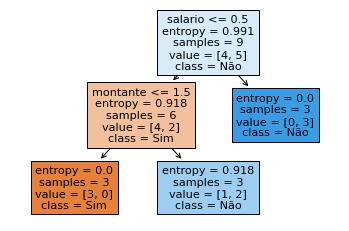

In [11]:
# Plotagem da árvore
clf = results[2].clf
f_names = test_x.columns
c_names = test_y.unique().astype(str)
print(f_names, c_names)
tree.plot_tree(clf, feature_names=f_names,class_names=c_names, filled=True)

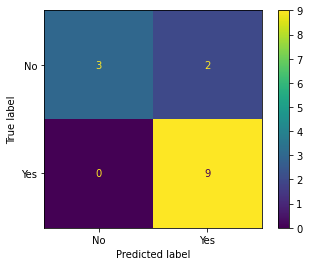

In [109]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(test_x);
cm = confusion_matrix(test_y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [108]:
# Testando para uma entrada específica:
W_test = pd.DataFrame({'outlook': [0], 'temp': [1], 'humidity': [1], 'windy': [0],})
y_pred = clf.predict(W_test)
y_pred

array(['Yes'], dtype=object)